In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.wrappers.scikit_learn import KerasClassifier #use Sequential Keras models as part of your Scikit-Learn workflow via the wrappers
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [ ]:
data = pd.read_csv("../input/iris/Iris.csv")
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data=data.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data = data.apply(pd.to_numeric)

In [ ]:
train, validate, test = np.split(data.sample(frac=1, random_state=42),[int(.6*len(data)), int(.8*len(data))])

xtrain = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
xtest = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
xval = validate[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

ytrain = train['Species']
ytest = test['Species']
yval = validate['Species']

xtrain = xtrain.to_numpy()
ytrain = np_utils.to_categorical(ytrain)


xval = xval.to_numpy()
yval = np_utils.to_categorical(yval)

In [ ]:
ytrain[:3]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Initializing Neural Network
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(30, input_dim=4))
model.add(Activation("relu"))
# Adding the second hidden layer
model.add(Dense(30))
model.add(Activation("relu"))
# Adding the output layer
model.add(Dense(3))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 30)                150       
_________________________________________________________________
activation_39 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 30)                930       
_________________________________________________________________
activation_40 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 93        
_________________________________________________________________
activation_41 (Activation)   (None, 3)                 0         
Total params: 1,173
Trainable params: 1,173
Non-trainable params: 0
___________________________________________________

In [ ]:
# Configure the learning proces with the optimizer algorithm (find optimal weights), the loss function and accuracy metrics
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(
    xtrain,
    ytrain,
    validation_data=(xval,yval),
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
3/3 [==============================] - 1s 94ms/step - loss: 1.9033 - accuracy: 0.3889 - val_loss: 1.4915 - val_accuracy: 0.2667
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 1.1927 - accuracy: 0.3889 - val_loss: 1.1106 - val_accuracy: 0.2667
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 0.9724 - accuracy: 0.3889 - val_loss: 0.9641 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.8858 - accuracy: 0.6333 - val_loss: 0.9088 - val_accuracy: 0.7000
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.8432 - accuracy: 0.7444 - val_loss: 0.8703 - val_accuracy: 0.9000
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.8119 - accuracy: 0.8444 - val_loss: 0.8462 - val_accuracy: 0.8667
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7873 - accuracy: 0.9000 - val_loss: 0.8167 - val_accuracy: 0.9333
Epoch 8/50
3/3 [===========

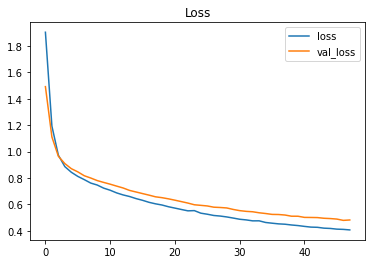

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
xtest = xtest.to_numpy()
ytest = np_utils.to_categorical(ytest)
results = model.evaluate(xtest,ytest, verbose=0)

print("    Test Loss:",(results[0]))
print("Test Accuracy:",(results[1] * 100),"%")

    Test Loss: 0.4686427414417267
Test Accuracy: 96.66666388511658 %


In [ ]:
#save the model as a h5 file
model.save('./iris_model.h5')